In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score,roc_auc_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y=df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [6]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [7]:
print(num_features)

Index(['reading_score', 'writing_score'], dtype='object')


In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    r2_square=r2_score(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    return mse, rmse,r2_square,mae

In [12]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

In [13]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    mse_train, rmse_train,r2_square_train,mae_train=evaluate_model(y_train,y_pred_train)
    mse_test, rmse_test,r2_square_test,mae_test=evaluate_model(y_test,y_pred_test)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print(f"Model perfomance for training data set")
    print(f"-Mean Squared Error: {round(mse_train,2)}")
    print(f"-Root mean squared error: {round(rmse_train,2)}")
    print(f"-R2 Score: {round(r2_square_train,2)}")
    print(f"-Mean Absolute Error: {round(mae_train,2)}")
    print("-"*35)
    print(f"Model perfomance for Test data set")
    print(f"-Mean Squared Error: {round(mse_test,2)}")
    print(f"-Root mean squared error: {round(rmse_test,2)}")
    print(f"-R2 Score: {round(r2_square_test,2)}")
    print(f"-Mean Absolute Error: {round(mae_test,2)}")
    r2_list.append((r2_square_test))
    print("="*35)
    print("\n")

Linear Regression
Model perfomance for training data set
-Mean Squared Error: 28.33
-Root mean squared error: 5.32
-R2 Score: 0.87
-Mean Absolute Error: 4.27
-----------------------------------
Model perfomance for Test data set
-Mean Squared Error: 29.1
-Root mean squared error: 5.39
-R2 Score: 0.88
-Mean Absolute Error: 4.21


Ridge
Model perfomance for training data set
-Mean Squared Error: 28.34
-Root mean squared error: 5.32
-R2 Score: 0.87
-Mean Absolute Error: 4.26
-----------------------------------
Model perfomance for Test data set
-Mean Squared Error: 29.06
-Root mean squared error: 5.39
-R2 Score: 0.88
-Mean Absolute Error: 4.21


Lasso
Model perfomance for training data set
-Mean Squared Error: 43.48
-Root mean squared error: 6.59
-R2 Score: 0.81
-Mean Absolute Error: 5.21
-----------------------------------
Model perfomance for Test data set
-Mean Squared Error: 42.51
-Root mean squared error: 6.52
-R2 Score: 0.83
-Mean Absolute Error: 5.16


K-Neighbors Regressor
Model p

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model Name,R2_score
1,Ridge,0.880593
0,Linear Regression,0.880433
7,Cat Boost Regressor,0.851632
5,Random Forest Regressor,0.848982
8,Ada Boost Regressor,0.846919
6,XGBRegressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree Regressor,0.750245


In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0, 0.5, 'Predicted')

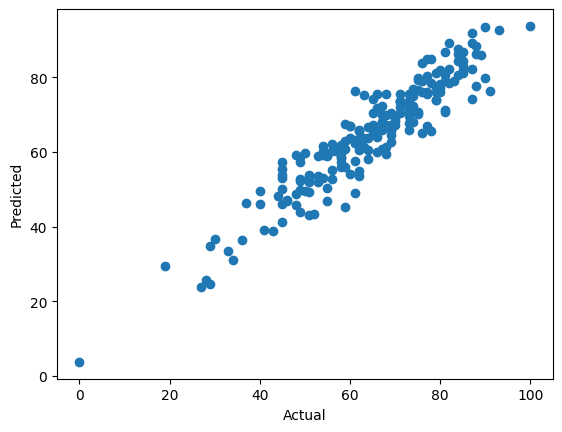

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

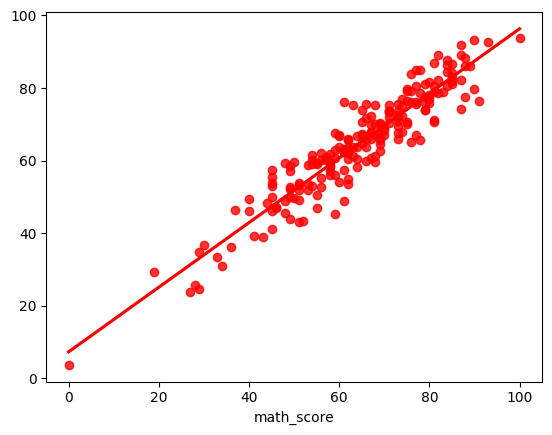

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
